# KITTI Dataset Extraction Notebook

In [1]:
## Import Required Libraries
import os
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
#Set Directories
base_dir = 'dataset'
image_dir = os.path.join(base_dir, 'image')
depth_dir = os.path.join(base_dir, 'groundtruth_depth')

In [3]:
def load_image(file_path):
    return np.array(Image.open(file_path))

def load_depth(file_path):
    return np.array(Image.open(file_path))

def visualize_data(image, depth):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('RGB Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(depth, cmap='viridis')
    plt.title('Depth Map')
    plt.axis('off')

    plt.show()

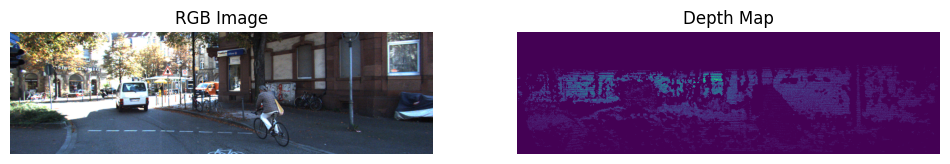

1000

In [4]:
# List all files in the image directory and sort them for alignment
image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir)])
depth_files = sorted([os.path.join(depth_dir, file) for file in os.listdir(depth_dir)])

# Ensure that the lists are aligned and have the same length
assert len(image_files) == len(depth_files), "The number of images and depth maps should be the same"

# Load the data into variables
images = [load_image(file) for file in image_files]
depth_maps = [load_depth(file) for file in depth_files]

# Visualize a sample from the dataset
visualize_data(images[30], depth_maps[30])

len(image_files)

In [37]:
def visualize_images(images):
    n = len(images)
    # Calculate number of rows and columns
    width = math.ceil(math.sqrt(n))
    height = math.ceil(n / width)
    plt.figure(figsize=(17.5, 5))
    fig, axes = plt.subplots(height, width)
    plt.subplots_adjust(wspace=0, hspace=0)
    if n == 1:
        axes.imshow(images[0])
        axes.axis('off')
        return
    for i, ax in enumerate(axes.flatten()):
        if(i<n): 
            # Display image
            ax.imshow(images[i].reshape(352, 1216, 3))
            ax.axis('off')
        else:
            # Hide axis if no image
            ax.axis('off')
    fig.set_size_inches(17.454545*width, 5*height)
    plt.show()
#visualize_images(images[:500:25])

In [36]:
# Flatten the images and depth maps for PCA
X_images = np.array([img.ravel() for img in images])
y_depths = np.array([depth.ravel() for depth in depth_maps])

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_images, y_depths, test_size=0.3)
#visualize_images(X_train[:25])

In [14]:
# Compute a PCA
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<Figure size 1750x500 with 0 Axes>

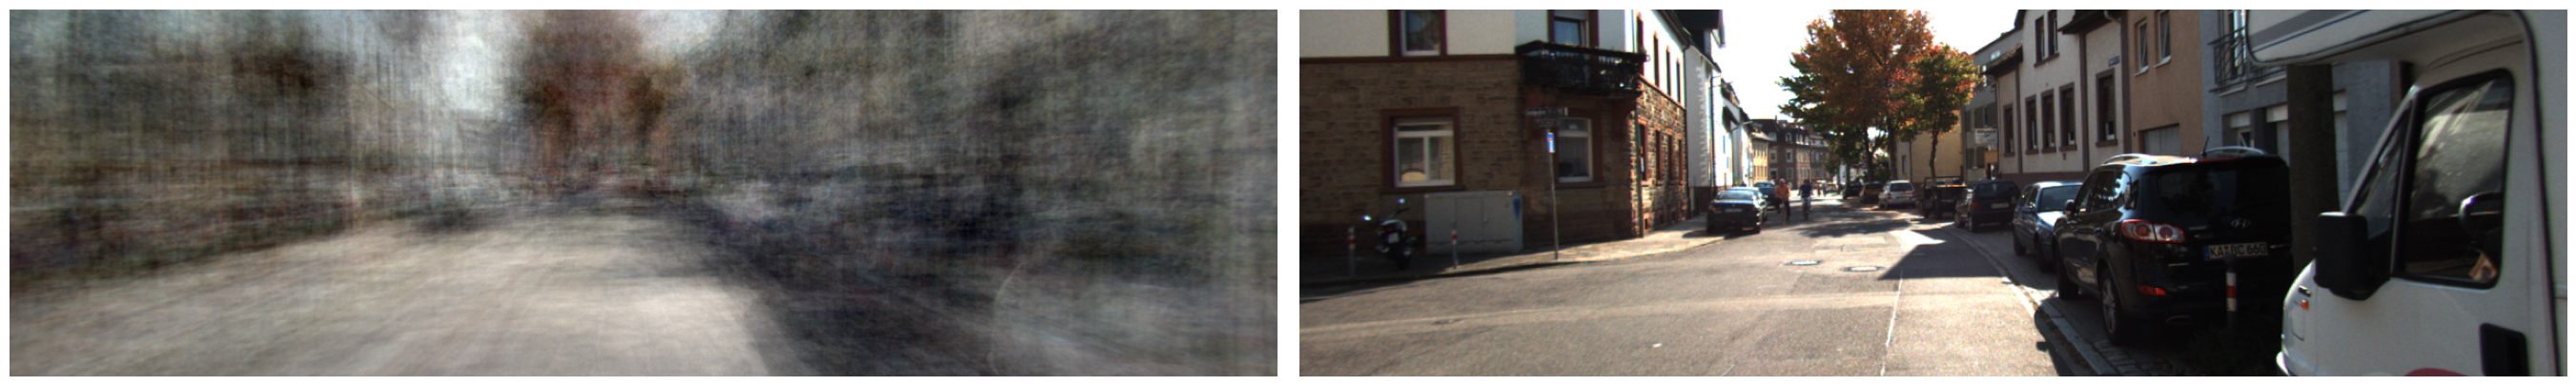

In [35]:
#return images to their original dimension
def reconstruct_images(pca, X_pca, range_ = []):
    if(range_ == []):
        range_ = range(X_pca.shape[0])
    X_projected = pca.inverse_transform(X_pca)
    
    # Initialize a list to hold all reconstructed images
    reconstructed_images_normalized = []

    # Loop through all the projected images
    for i in range_:
        # Reshape each image
        reconstructed_image = X_projected[i].reshape(352, 1216, 3)
        
        # Normalize the pixel values to the [0, 255] range
        reconstructed_image_normalized = (reconstructed_image - np.min(reconstructed_image)) / (np.max(reconstructed_image) - np.min(reconstructed_image))
        reconstructed_image_normalized = (reconstructed_image_normalized * 255).astype(np.uint8)
        
        # Append the normalized image to the list
        reconstructed_images_normalized.append(reconstructed_image_normalized)
    
    return reconstructed_images_normalized
visualize_images([reconstruct_images(pca, X_train_pca,[50])[0], X_train[50]])
#visualize_images([pca.components_[10].reshape(352, 1216, 3), images[99]])
#visualize_images(reconstruct_images(pca, X_train_pca, range(0,700,26)))
